In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
import seaborn as sns

In [2]:
df = pd.read_csv('C:/StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.shape

(1000, 8)

In [9]:
df = df.interpolate()
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
q1=df['math score'].quantile(0.25)
q3=df['math score'].quantile(0.75)
q1,q3

(57.0, 77.0)

<AxesSubplot:>

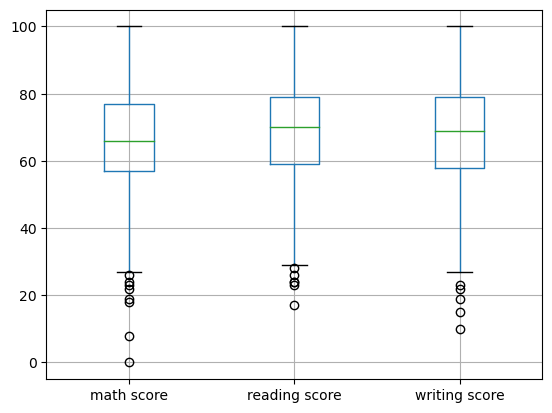

In [11]:
df.boxplot()

In [12]:
iqr = q3-q1
iqr

20.0

In [13]:
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
print("maximum : ",upper," minimum : ",lower)

maximum :  107.0  minimum :  27.0


In [14]:
final = df[(df['math score']>lower )& (df['math score']<upper)]

In [15]:
final

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [16]:
final['math score']<27

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 990, dtype: bool

In [17]:
x = np.random.normal(0,2,1000)
skew(x)

-0.0651469669146547

<AxesSubplot:>

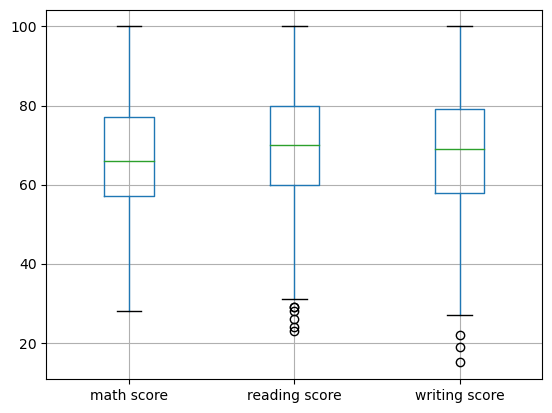

In [18]:
final.boxplot()

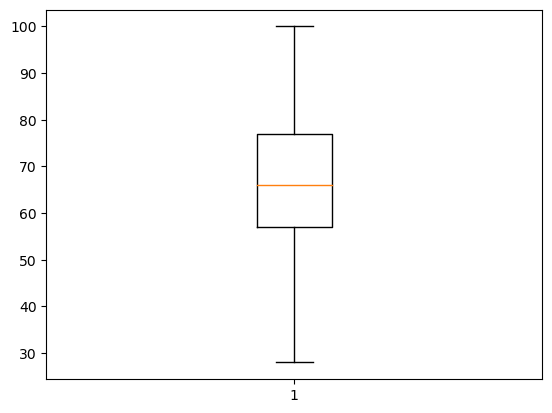

In [19]:
plt.boxplot(final['math score'])
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

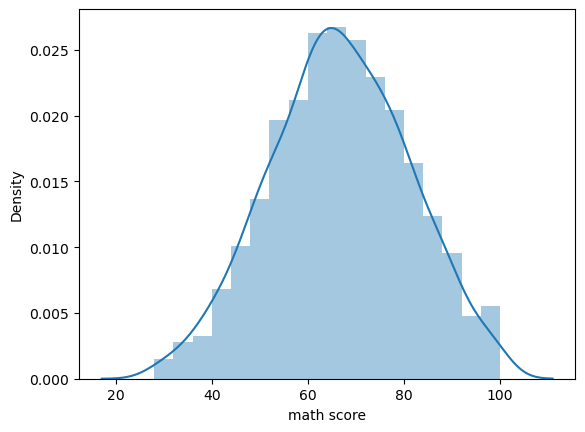

In [20]:
sns.distplot(final['math score'])

In [21]:
df['new_math_score']=np.log(df['math score'])

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,new_math_score
0,female,group B,bachelor's degree,standard,none,72,72,74,4.276666
1,female,group C,some college,standard,completed,69,90,88,4.234107
2,female,group B,master's degree,standard,none,90,95,93,4.499810
3,male,group A,associate's degree,free/reduced,none,47,57,44,3.850148
4,male,group C,some college,standard,none,76,78,75,4.330733
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,4.477337
996,male,group C,high school,free/reduced,none,62,55,55,4.127134
997,female,group C,high school,free/reduced,completed,59,71,65,4.077537
998,female,group D,some college,standard,completed,68,78,77,4.219508


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = final.iloc[:,5:8]
x_scaled = scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled,columns=['math score','reading score', 'writing score'])

In [24]:
df_normalized





,math score,reading score,writing score
0,0.611111,0.636364,0.694118
1,0.569444,0.870130,0.858824
2,0.861111,0.935065,0.917647
3,0.263889,0.441558,0.341176
4,0.666667,0.714286,0.705882
...,...,...,...
985,0.833333,0.987013,0.941176
986,0.472222,0.415584,0.470588
987,0.430556,0.623377,0.588235
988,0.555556,0.714286,0.729412


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

In [26]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,new_math_score
0,0,group B,bachelor's degree,standard,none,72,72,74,4.276666
1,0,group C,some college,standard,completed,69,90,88,4.234107
2,0,group B,master's degree,standard,none,90,95,93,4.499810
3,1,group A,associate's degree,free/reduced,none,47,57,44,3.850148
4,1,group C,some college,standard,none,76,78,75,4.330733
...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95,4.477337
996,1,group C,high school,free/reduced,none,62,55,55,4.127134
997,0,group C,high school,free/reduced,completed,59,71,65,4.077537
998,0,group D,some college,standard,completed,68,78,77,4.219508
